In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
#import cftime
import xarray as xr
#import wget
import os
import glob
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Télécharger les fichiers grib pour tester les codes xarray. Il faut considérer à passer plus de temps sur sarracenia.

In [2]:
#url = 'https://dd.weather.gc.ca/model_gem_global/15km/grib2/lat_lon/00/024/CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P024.grib2'
#filename = wget.download(url)

In [3]:
os.listdir()

['CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P012.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P009.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P018.grib2.4cc40.idx',
 '.DS_Store',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P006.grib2.4cc40.idx',
 'LICENSE',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P009.grib2.4cc40.idx',
 'test_xarray_gfs_bucket.ipynb',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P000.grib2.4cc40.idx',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P024.grib2.4cc40.idx',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P015.grib2',
 'README.md',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P024.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P000.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P021.grib2.4cc40.idx',
 'cmc_test.ipynb',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P006.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P003.grib2',
 '.ipynb_checkpoints',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P015.grib2.4cc40.idx',
 '.

In [4]:
grib_list=glob.glob('*.grib2')
grib_list

['CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P012.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P009.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P015.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P024.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P000.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P006.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P003.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P018.grib2',
 'CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P021.grib2']

Traitement avec xarray

In [5]:
ds = xr.open_dataset('CMC_glb_TMP_TGL_2_latlon.15x.15_2021022200_P021.grib2', engine='cfgrib')

In [6]:
ds = ds - 273.15

In [7]:
t2m=ds.t2m

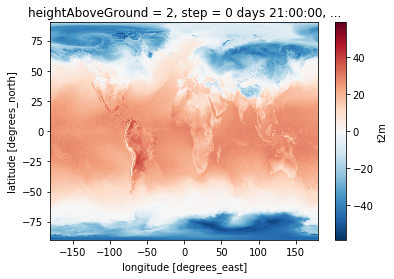

In [8]:
t2m.plot()

In [9]:
plt.show()

In [10]:
ds2=xr.open_mfdataset(grib_list,concat_dim='time',engine='cfgrib')

/Users/caramelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/Users/caramelo/anaconda3/lib/python3.6/site-packages/xarray/backends/api.py:933: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


In [11]:
ds2

<xarray.Dataset>
Dimensions:            (latitude: 1201, longitude: 2400, time: 9)
Coordinates:
    heightAboveGround  int64 2
  * longitude          (longitude) float64 -180.0 -179.8 -179.7 ... 179.7 179.9
  * latitude           (latitude) float64 -90.0 -89.85 -89.7 ... 89.7 89.85 90.0
  * time               (time) datetime64[ns] 2021-02-22 ... 2021-02-22
    step               (time) timedelta64[ns] 0 days 12:00:00 ... 21:00:00
    valid_time         (time) datetime64[ns] 2021-02-22T12:00:00 ... 2021-02-22T21:00:00
Data variables:
    t2m                (time, latitude, longitude) float32 dask.array<chunksize=(1, 1201, 2400)>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal 
    history:                 2021-02-23T09:25:41 GRIB to CDM+CF via cfgrib-0....

(array([  97095., 1185136., 1956960., 2036925., 1733986., 3870279.,
        3641638., 4873779., 6409838.,  135964.]),
 array([213.97588, 224.22739, 234.47888, 244.73038, 254.98189, 265.2334 ,
        275.4849 , 285.7364 , 295.9879 , 306.2394 , 316.4909 ],
       dtype=float32),
 <a list of 10 Patch objects>)

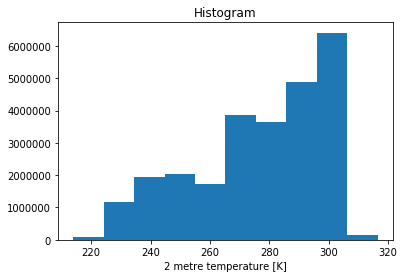

In [12]:
t2m=ds2.t2m
t2m.plot()

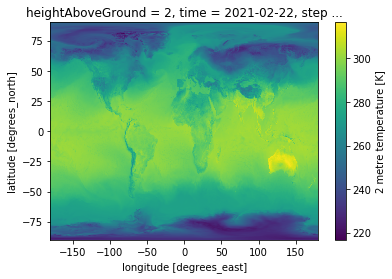

In [13]:
t2m.isel(time=5).plot()

In [19]:
t2m.valid_time

<xarray.DataArray 'valid_time' (time: 9)>
array(['2021-02-22T12:00:00.000000000', '2021-02-22T09:00:00.000000000',
       '2021-02-22T15:00:00.000000000', '2021-02-23T00:00:00.000000000',
       '2021-02-22T00:00:00.000000000', '2021-02-22T06:00:00.000000000',
       '2021-02-22T03:00:00.000000000', '2021-02-22T18:00:00.000000000',
       '2021-02-22T21:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    heightAboveGround  int64 2
  * time               (time) datetime64[ns] 2021-02-22 ... 2021-02-22
    step               (time) timedelta64[ns] 0 days 12:00:00 ... 21:00:00
    valid_time         (time) datetime64[ns] 2021-02-22T12:00:00 ... 2021-02-22T21:00:00
Attributes:
    standard_name:  time
    long_name:      time

In [22]:
print(t2m)

<xarray.DataArray 't2m' (time: 9, latitude: 1201, longitude: 2400)>
dask.array<concatenate, shape=(9, 1201, 2400), dtype=float32, chunksize=(1, 1201, 2400)>
Coordinates:
    heightAboveGround  int64 2
  * longitude          (longitude) float64 -180.0 -179.8 -179.7 ... 179.7 179.9
  * latitude           (latitude) float64 -90.0 -89.85 -89.7 ... 89.7 89.85 90.0
  * time               (time) datetime64[ns] 2021-02-22 ... 2021-02-22
    step               (time) timedelta64[ns] 0 days 12:00:00 ... 21:00:00
    valid_time         (time) datetime64[ns] 2021-02-22T12:00:00 ... 2021-02-22T21:00:00
Attributes:
    GRIB_paramId:                             167
    GRIB_shortName:                           2t
    GRIB_units:                               K
    GRIB_name:                                2 metre temperature
    GRIB_cfName:                              air_temperature
    GRIB_cfVarName:                           t2m
    GRIB_dataType:                            af
    GRIB_missingV

In [15]:
t2m[3].time['step']

<xarray.DataArray 'step' ()>
array(86400000000000, dtype='timedelta64[ns]')
Coordinates:
    heightAboveGround  int64 2
    time               datetime64[ns] 2021-02-22
    step               timedelta64[ns] 1 days
    valid_time         datetime64[ns] 2021-02-23
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period

In [16]:
#fg = t2m.plot(
#    col="valid_time",
#    col_wrap=4,  # each row has a maximum of 4 columns
#)

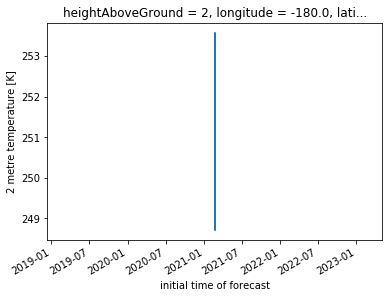

In [26]:
#t2m.sel(latitude=51.5).plot()
#plt.title('ERA5 - London 2m temperature March 2019')
ds2.t2m.isel(longitude=0,latitude=51).plot()

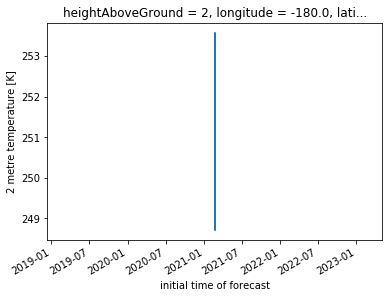

In [30]:
ds2.t2m.isel(longitude=0,latitude=51).plot()

In [33]:
x=ds2.t2m.isel(longitude=0,latitude=51)

In [39]:
x.values

array([250.13907, 250.70378, 250.08948, 253.57588, 248.70023, 250.96591,
       250.60971, 250.88037, 251.86368], dtype=float32)

In [48]:
ds2.valid_time.values

array(['2021-02-22T12:00:00.000000000', '2021-02-22T09:00:00.000000000',
       '2021-02-22T15:00:00.000000000', '2021-02-23T00:00:00.000000000',
       '2021-02-22T00:00:00.000000000', '2021-02-22T06:00:00.000000000',
       '2021-02-22T03:00:00.000000000', '2021-02-22T18:00:00.000000000',
       '2021-02-22T21:00:00.000000000'], dtype='datetime64[ns]')

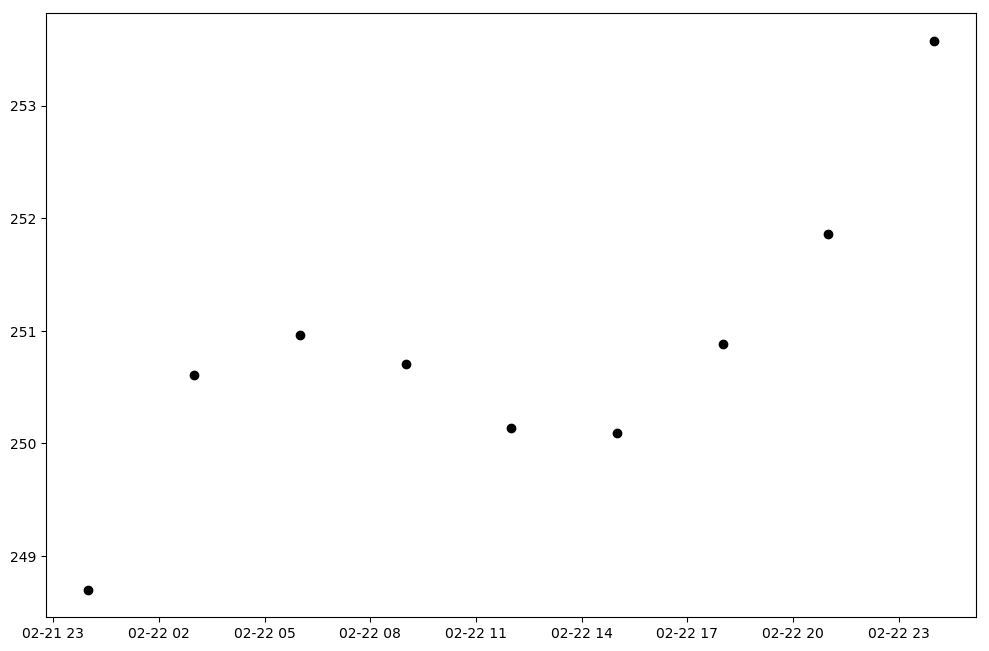

In [52]:
plt.plot(ds2.valid_time.values,x.values,'o',color='black')

Possibilité de tout mettre en tant que dataframes par la suite.